# Deep Learning Intro 1

Feed Forward Network ~ function composition

Tensorflow -- make computations given the computational network -- cnw ~ tensor computations

<img src="./neuron_model.jpeg"  width="50%">

keras ~ wrapper

In [1]:
import matplotlib.pyplot as plt
import keras

from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Flatten


from keras.optimizers import Adam

import numpy as np


%matplotlib inline

Using TensorFlow backend.


In [2]:
#set up random seed for debugging
np.random.seed(666)

In [3]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print "category of first stuff:", Y_train[0]

category of first stuff: 9


In [4]:
#normalize stuff
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
#save last 20% from x_train, y_train for validation set (for model tuning)
val_size = len(X_train) // 5
x_val = X_train[-val_size:]
y_val = Y_train[-val_size:]
x_train = X_train[:-val_size]
y_train = Y_train[:-val_size]

print("Train data shape ", x_train.shape)
print("Train label shape ", y_train.shape)
print("Validation data shape ", x_val.shape)
print("Validation label shape ", y_val.shape)
print("Test data shape ", X_test.shape)
print("Test label shape ", Y_test.shape)

('Train data shape ', (48000, 28, 28))
('Train label shape ', (48000,))
('Validation data shape ', (12000, 28, 28))
('Validation label shape ', (12000,))
('Test data shape ', (10000, 28, 28))
('Test label shape ', (10000,))


dense, everybody is connected to the input layer

$$Wx+b$$

--> (28x28) x 512 + 512 parmeters for the first layer

**Relu**


**Sigmoid**


**Softmax**


**Dropout**
Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network. Weights of neurons are tuned for specific features providing some specialization. Neighboring neurons become to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data. This reliant on context for a neuron during training is referred to complex co-adaptations.

You can imagine that if neurons are randomly dropped out of the network during training, that other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.



In [6]:
#define network architecture 
#computational graph creation

#we create the "model" 
    #architecture

INPUT_SHAPE=X_train.shape[1:]


# Two layer dense network
model = Sequential([
    Flatten(input_shape=INPUT_SHAPE),#<---------- 2D to 1D
    Dense(512, activation='relu'),   #<---------- 512 neurons in the first layer, 
    Dense(128, activation = 'relu'),
    #Dense(128, activation = 'sigmoid'),#<-------- the gradient can be 0 -- learns slower! relu is actually better
    Dense(10, activation='softmax')
])

model.summary()
    
    
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [7]:
#adam is a momentum minimzer, lr is a hyperparameter (learning rate)
#we could use L2 distance as the error, but instead we use chategirical cross entropy
    #there is a bunch defined in the keras documentation
    #or u can write your own function
    
#accuracy is not the same as the loss function! - it is not differentiable --> back prop does not work

model.compile(optimizer=Adam(lr=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [8]:
#the back propagation doesnt happen after evaluating in 80000 points
#happens in groups of batch_size
#epoch tell how many rounds we teach

#we give it the validation data for the verbose to be able to show the result


#stochastic batch (random batching) gradient descend
#there is some indeterministic tensorflow optimization descisions --> even with the seed fixed the result is different


BATCH_SIZE = 512
NB_EPOCHS = 20

history = model.fit(x_train, y_train,
                     batch_size=BATCH_SIZE,
                     epochs=NB_EPOCHS,
                     verbose=1,
                     validation_data=(x_val, y_val))

#really deep networks usually perform worse

#teaching these can be done due to 2 big advancements:
    #batch renormalization 
    #resnet

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.6101 - acc: 0.7943 - val_loss: 0.4491 - val_acc: 0.8403
Epoch 2/20
48000/48000 [==============================] - 2s 32us/step - loss: 0.4171 - acc: 0.8530 - val_loss: 0.4049 - val_acc: 0.8538
Epoch 3/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.3600 - acc: 0.8721 - val_loss: 0.3656 - val_acc: 0.8731
Epoch 4/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.3274 - acc: 0.8826 - val_loss: 0.3350 - val_acc: 0.8813
Epoch 5/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.3120 - acc: 0.8875 - val_loss: 0.3539 - val_acc: 0.8742
Epoch 6/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.2918 - acc: 0.8937 - val_loss: 0.3167 - val_acc: 0.8859
Epoch 7/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.2780 - acc: 0.8987 - val_loss: 0.3284 - val_acc

In [9]:
#test our results

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.3621014052212238)
('Test accuracy:', 0.8723)


In [10]:
print history

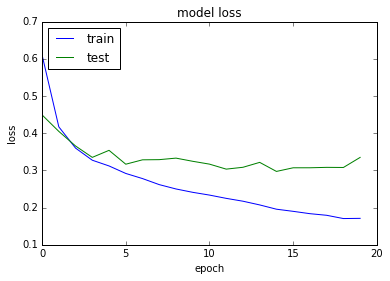

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

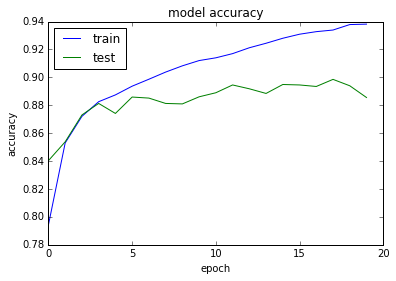

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')